In [1]:
import os 
import re
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

/home/anverdie/DLP_DISC/M788988


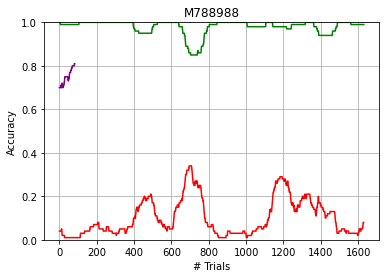

/home/anverdie/DLP_DISC/M786654
/home/anverdie/DLP_DISC/M770981


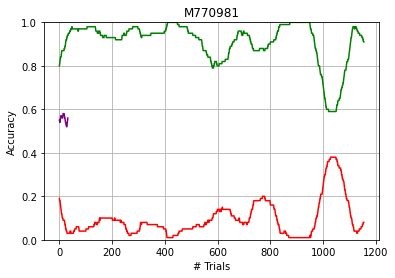

/home/anverdie/DLP_DISC/M786658
/home/anverdie/DLP_DISC/M786656


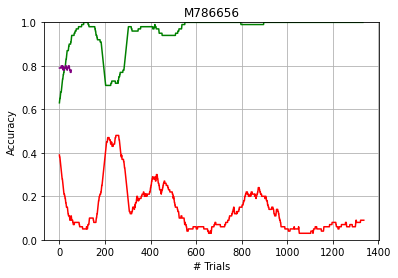

In [18]:
rootdir = '/home/anverdie/DLP_DISC/'
pattern = re.compile('M[0-9]{6}')
mice = [os.path.join(rootdir, path) for path in os.listdir(rootdir) if pattern.match(path)]
tag = 'GoNoGoWiBlank'
for mouse in mice:
    print(mouse)
    mouse_id = os.path.basename(os.path.normpath(mouse))
    paths = [os.path.join(mouse, path, 'Stims.mat') for path in os.listdir(mouse)]
    datafiles = [sio.loadmat(path) for path in paths if os.path.exists(path) and tag in path]
    if datafiles:
        # Get sneakpeak into evolution 
        smoothness = 100
        corrs, stims, outs = [], [], []
        for data in datafiles:
            stims.append(data['ExperimentInfo']['TrialSequence'][0][0][0])
            corrs.append(data['ExperimentInfo']['Correct'][0][0][0])
            outs.append(data['ExperimentInfo']['OutComeTrials'][0][0][0])
        
        corrs = np.concatenate(corrs)
        outs = np.concatenate(outs)
        stims = np.concatenate(stims)

        idx_gos = np.where(stims == 1)[0]
        idx_nogos = np.where(stims == 2)[0]
        idx_blank = np.where(stims == 0)[0]
        
        go_corr = corrs[idx_gos]
        nogo_corr = corrs[idx_nogos]
        blank_corr = corrs[idx_blank]
        
        convo_corr = np.convolve(corrs, np.ones(smoothness)/smoothness, mode='valid')
        convo_go_corr = np.convolve(go_corr, np.ones(smoothness)/smoothness, mode='valid')
        convo_nogo_corr = np.convolve(nogo_corr, np.ones(smoothness)/smoothness, mode='valid')
        convo_blank_corr = np.convolve(blank_corr, np.ones(smoothness)/smoothness, mode='valid')

        #plt.plot(convo_corr, color='blue')
        plt.plot(convo_go_corr, color='green')
        plt.plot(convo_nogo_corr, color='red')
        plt.plot(convo_blank_corr, color='purple')
        
        plt.plot
        plt.ylim((0, 1))
        plt.xlabel('# Trials')
        plt.ylabel('Accuracy')
        plt.title(mouse_id)
        plt.grid()
        plt.show()
